<a href="https://colab.research.google.com/github/alyhussein86/dW09zyvFygXpgTTg/blob/main/P4_MonReader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Network

### Importing the libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [147]:
pip install scikeras

In [148]:
import tensorflow as tf
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, make_scorer, confusion_matrix
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier
import pandas as pd

In [3]:
tf.__version__

'2.12.0'

In [22]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))


Found GPU at: /device:GPU:0


## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   fill_mode="nearest")
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/images/training/',
                                                 target_size = (100, 100),
                                                 batch_size = 64,
                                                 class_mode = 'binary'
                                                 )

Found 2392 images belonging to 2 classes.


### Preprocessing the Test set

In [5]:
test_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                  fill_mode="nearest")
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/images/testing/',
                                            target_size = (100, 100),
                                            batch_size = 32,
                                            class_mode = 'binary',
                                            shuffle = False)

Found 597 images belonging to 2 classes.


In [6]:
class_name_train = training_set.class_indices
print(class_name_train)
class_name_test = test_set.class_indices
print(class_name_test)

{'flip': 0, 'notflip': 1}
{'flip': 0, 'notflip': 1}


In [7]:
for image_batch, labels_batch in training_set:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(64, 100, 100, 3)
(64,)


In [8]:
print(class_name_test.values())

dict_values([0, 1])


## Part 2 - Building the CNN

### Initialising the CNN

In [9]:
cnn = tf.keras.models.Sequential()


In [10]:
cnn.dtype

'float32'

### Step 1 - Convolution

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=4, activation='relu', input_shape=[100, 100, 3]))


### Step 2 - Pooling

### Adding a second convolutional layer

In [12]:
cnn.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100,100,3)))
cnn.add(tf.keras.layers.MaxPool2D((3,3)))
cnn.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D((3,3)))
cnn.add(tf.keras.layers.Conv2D(128, (3,3), activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D((3,3)))

### Step 3 - Flattening

In [13]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [14]:
cnn.add(tf.keras.layers.Dense(units=256, activation='relu'))

### Step 5 - Output Layer

In [15]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [17]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 97, 97, 32)        1568      
                                                                 
 conv2d_1 (Conv2D)           (None, 95, 95, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 9, 9, 64)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 128)         7

## Part 3 - Training the CNN

### Compiling the CNN

In [18]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.binary_crossentropy,
              metrics=[tf.keras.metrics.BinaryAccuracy()])
              # ,tf.keras.metrics.FalseNegatives()])

In [19]:
# cnn.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

In [20]:
print(cnn.output_shape)

(None, 1)


In [21]:
print(cnn.input_shape)

(None, 100, 100, 3)


### Training the CNN on the Training set and evaluating it on the Test set

In [23]:
history = cnn.fit(x = training_set, validation_data = test_set, epochs = 25, batch_size= 25)

Epoch 1/25
38/38 [==============================] - 878s 23s/step - loss: 0.6911 - binary_accuracy: 0.5552 - val_loss: 0.6818 - val_binary_accuracy: 0.4858
Epoch 2/25
38/38 [==============================] - 52s 1s/step - loss: 0.6285 - binary_accuracy: 0.6484 - val_loss: 0.5787 - val_binary_accuracy: 0.7136
Epoch 3/25
38/38 [==============================] - 50s 1s/step - loss: 0.5740 - binary_accuracy: 0.7199 - val_loss: 0.5794 - val_binary_accuracy: 0.6868
Epoch 4/25
38/38 [==============================] - 49s 1s/step - loss: 0.5189 - binary_accuracy: 0.7584 - val_loss: 0.4583 - val_binary_accuracy: 0.8074
Epoch 5/25
38/38 [==============================] - 51s 1s/step - loss: 0.4470 - binary_accuracy: 0.8094 - val_loss: 0.3984 - val_binary_accuracy: 0.8291
Epoch 6/25
38/38 [==============================] - 52s 1s/step - loss: 0.3789 - binary_accuracy: 0.8453 - val_loss: 0.3154 - val_binary_accuracy: 0.8760
Epoch 7/25
38/38 [==============================] - 50s 1s/step - loss: 0.

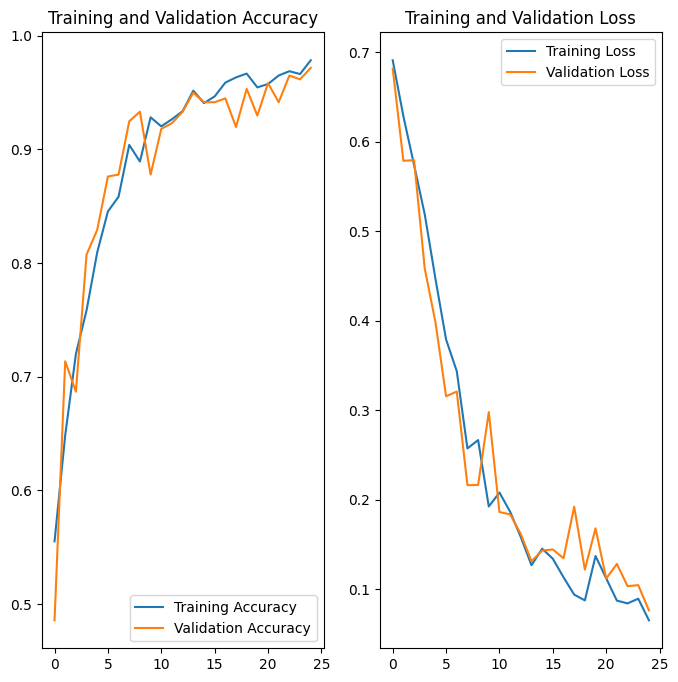

In [24]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(25)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Part 4 - Making a single prediction

In [26]:
# test_image = Image.open('/content/drive/MyDrive/images/flip_or_noflip_1.jpg')
test_image =  Image.open('/content/drive/MyDrive/images/flip_or_noflip_2.jpg')
test_image = test_image.resize((100, 100))
test_image = np.expand_dims(test_image, axis = 0)
image_array = np.array(test_image)/255.0

# Reshape the image array to match the input shape expected by the model
# input_array = image_array.reshape(1, 100, 100, 3)  # Assuming a color image with shape (64, 64, 3)
result_i = cnn.predict(image_array)
print(result_i)
training_set.class_indices
if result_i[0][0] >= 0.5:
  prediction = 'Flip'
else:
  prediction = 'NotFlip'

print(prediction)

1/1 [==============================] - 0s 255ms/step
[[0.99215186]]
Flip


In [25]:
cnn.evaluate(test_set)

19/19 [==============================] - 10s 520ms/step - loss: 0.0708 - binary_accuracy: 0.9749


[0.07080201059579849, 0.9748743772506714]

In [27]:
y_pred = cnn.predict(test_set)

19/19 [==============================] - 10s 552ms/step


Adding Another Augmented Flipped layer

In [193]:
data_augmentation = tf.keras.models.Sequential(
  [
    tf.keras.layers.RandomFlip("horizontal",
                      input_shape=(100,
                                  100,
                                  3)),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
  ]
)

In [197]:
cnn = tf.keras.models.Sequential([
  data_augmentation,
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(16, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu')
])

In [200]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [201]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 100, 100, 3)       0         
                                                                 
 rescaling_3 (Rescaling)     (None, 100, 100, 3)       0         
                                                                 
 conv2d_13 (Conv2D)          (None, 98, 98, 16)        448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 49, 49, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 47, 47, 32)        4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 23, 23, 32)       0         
 g2D)                                                 

In [202]:
cnn.output

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_6')>

In [203]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.binary_crossentropy,
              metrics=[tf.keras.metrics.BinaryAccuracy()])

### Training the additional CNN on the Training set and evaluating it on the Test set

In [ ]:
history = cnn.fit(x = training_set, validation_data = test_set, epochs = 10, batch_size= 100)

Epoch 1/25
38/38 [==============================] - 70s 2s/step - loss: 0.6936 - binary_accuracy: 0.5067 - val_loss: 0.6929 - val_binary_accuracy: 0.5142
Epoch 2/25
38/38 [==============================] - 53s 1s/step - loss: 0.6931 - binary_accuracy: 0.5142 - val_loss: 0.6929 - val_binary_accuracy: 0.5142
Epoch 3/25
38/38 [==============================] - 51s 1s/step - loss: 0.6929 - binary_accuracy: 0.5142 - val_loss: 0.6928 - val_binary_accuracy: 0.5142
Epoch 4/25
38/38 [==============================] - 52s 1s/step - loss: 0.6929 - binary_accuracy: 0.5142 - val_loss: 0.6927 - val_binary_accuracy: 0.5142
Epoch 5/25
38/38 [==============================] - 51s 1s/step - loss: 0.6928 - binary_accuracy: 0.5142 - val_loss: 0.6927 - val_binary_accuracy: 0.5142
Epoch 6/25
38/38 [==============================] - 50s 1s/step - loss: 0.6929 - binary_accuracy: 0.5142 - val_loss: 0.6927 - val_binary_accuracy: 0.5142
Epoch 7/25
38/38 [==============================] - 51s 1s/step - loss: 0.69

In [ ]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(25)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
cnn.evaluate(test_set)

Setting New Predictions

In [129]:
predicted_labels = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
print(predicted_labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [28]:
print(len(y_pred))

597


In [192]:
print(test_set.classes)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

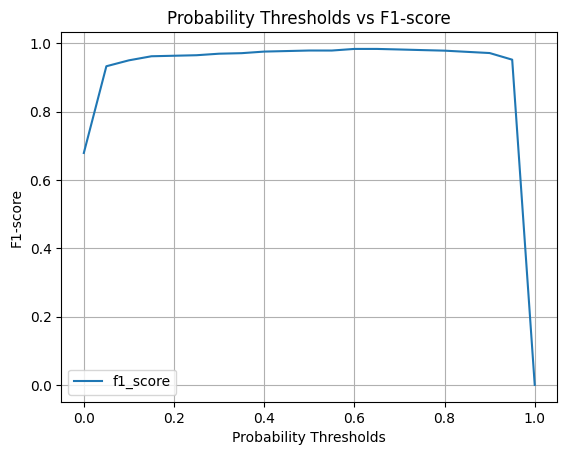

In [54]:
thresholds = np.arange(21)*0.05
f1 = []

for thres in thresholds:
    y_predics = np.where(y_pred > thres, 1, 0)
    f1.append(f1_score(test_set.classes, y_predics))

plt.figure()
plt.plot(thresholds, f1, label='f1_score')
plt.xlabel('Probability Thresholds')
plt.ylabel('F1-score')
plt.title('Probability Thresholds vs F1-score')
plt.legend()
plt.grid()
plt.show()

In [165]:
prediction_label = []
for i in range(len(y_pred)):
    if y_pred[i][0] >= 0.5:
        prediction_label.append('flip')
    else:
        prediction_label.append('notflip')

In [166]:
print(test_set.class_indices)

{'flip': 0, 'notflip': 1}


In [167]:
prediction_label = pd.DataFrame(prediction_label)

In [168]:
print(prediction_label)

           0
0    notflip
1    notflip
2    notflip
3    notflip
4    notflip
..       ...
592     flip
593     flip
594     flip
595     flip
596     flip

[597 rows x 1 columns]


In [169]:
prediction_label = prediction_label.applymap(lambda x:1 if x == 'notflip' else 0)

In [175]:
prediction_label.value_counts()

0    318
1    279
dtype: int64

In [51]:
# Print the F1 score
print("F1 score:", f1)

F1 score: [0.6792035398230089, 0.9331306990881459, 0.9504643962848297, 0.9623824451410659, 0.9638932496075354, 0.9654088050314467, 0.9698890649762282, 0.9714285714285715, 0.9760765550239235, 0.9776357827476039, 0.9792, 0.9791332263242376, 0.9838709677419355, 0.9838709677419355, 0.9822294022617124, 0.9804560260586319, 0.9787928221859705, 0.9752883031301481, 0.9718076285240465, 0.9523809523809524, 0.0]


In [70]:
F1_SCORE =np.max(f1, axis=0)
print(F1_SCORE)

0.9838709677419355


In [179]:
prediction_label.shape
# test_set.classes.shape

(597, 1)

In [178]:
print("F1 score:", f1_score(test_set.classes, prediction_label))

F1 score: 0.00341296928327645


In [176]:
from sklearn.metrics import classification_report

print(classification_report(test_set.classes, prediction_label))

              precision    recall  f1-score   support

           0       0.04      0.04      0.04       290
           1       0.00      0.00      0.00       307

    accuracy                           0.02       597
   macro avg       0.02      0.02      0.02       597
weighted avg       0.02      0.02      0.02       597



In [132]:
param_grid = {
    'filters': [16, 32, 64],
    'kernel_size': [(3, 3), (5, 5)],
    'pool_size': [(2, 2), (3, 3)],
    'dense_units': [64, 128, 256],
    'dropout_rate': [0.2, 0.3, 0.4],
    'batch_size': [32, 64],
    'epochs': [10, 20]
}

print(training_set)

# Perform grid search cross-validation
f1_scorer = make_scorer(f1_score)
grid = GridSearchCV(estimator=cnn, param_grid=param_grid, cv=3, scoring=f1_scorer)
grid_result = grid.fit(X=training_set.classes, prediction_labels)

# Step 4: Print the results
print("Best F1 score: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, std, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, std, param))

TypeError: ignored

In [ ]:
clf = KerasClassifier(cnn, loss="categorical_crossentropy", batch_size=32,
    optimizer='Adam', metrics={'BinaryAccuracy','FalseNegatives'}, validation_split=20.0, epochs=20, class_weight=8)

In [ ]:
clf.fit(training_set, test_set, epochs=20, batch=32, n_jobs=-1)

In [ ]:
result_c = clf.predict(input_array)
print(result_c)
training_set.class_indices
if result[0][0] >= 0.731:
  predictions = 'Flip'
else:
  predictions = 'NotFlip'

print(predictions)